### Project: Problem Statement - Term Deposit Subscription - Sananda Velacheri
 

#### Problem statement (Term Deposit Sale)

We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.


#### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

 

#### Resources Available

The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

 

#### Deliverable –1 (Exploratory data analysis)–(15)

##### Univariate analysis (9marks)
- Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - 3 Marks

- Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - 3 Marks

- Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - 3 Marks

- Multivariate analysis (6marks)

- Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? - 3 Marks

- Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves. - 3 Marks
 

#### Deliverable –2 (Prepare the data for analytics)–(5)

- Label encode or create dummy variables for categorical variables. Give reason for selecting either of them. - 2 Marks

- Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data. - 3 Marks
 

#### Deliverable –3 (Create the ensemble model)–(30)

- Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. - 10 Marks

- Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns - 5 Marks

- Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one-  of the models from above. Give your reason for the same. - 5 Marks

- Answer the following questions : - 10 Marks

- What do you mean by recall and what information does it provide here?
- Suggest some changes for the organization so that they can increase the number of customers who take term deposit.
- How much influence does the previous campaign and mode of interaction have on financial performance.
- Which features should be more/less focused by the bank to get better results and why?
- What did you learn about banking industries from this data?
 
Note : Use random_state=7 (wherever the parameter can be used) so that we can compare all submissions.

#### Provide comments in the solution notebook regarding the steps you take and also provide insights drawn from the plots. - 5 Marks.

#### Marks distribution for Students with recall_score (pos_label = ‘yes’) on the test set:

- Above 43% - 5 Marks

- Between 40% to 43% - 4 Marks

- Less than 40% - 3 Marks

- Note : Make sure you are not overfitting the model in order to increase the recall score only.

#### Attribute Information

- age
- job : type of job
- marital : marital status
- education
- default: has credit in default?
- housing: has housing loan?- loan: has personal loan?
- balance in account
- contact: contact communication type
- month: last contact month of year
- day: last contact day of the month
- duration: last contact duration, in seconds
- campaign: number of contacts performed during this campaign and for this client
- pdays: number of days that passed by after the client was last contacted from a previous campaign
- previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign
- Output variable ('Target'): has the client subscribed a term deposit?

## Deliverable 1 : Exploratory Data analysis

In [203]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.options.display.float_format = '{:,.2f}'.format


In [204]:
# List .csv file
!ls *.csv

bank-full.csv


In [205]:
# Import dataset
df = pd.read_csv('bank-full.csv')

In [206]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [207]:
# Shape
df.shape

(45211, 17)

In [208]:
# Null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

**Insights:**
- Dataset has 45211 rows and 17 columns
- No null values

#### Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - 3 Marks

In [209]:
# Statistical Summary
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [210]:
numeric_columns = list( df.describe().columns)

In [211]:
def num_outliers(df,feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR =  Q3 - Q1 
    filter = ( (df[feature] > Q3 + 1.5*IQR) | (df[feature] < Q1-1.5*IQR) )
    # Percentage of records that are outliers
    print(len(df[filter][feature])/len(df[feature])*100)

In [212]:
num_outliers(df,'campaign')

6.7771117648359915


In [213]:
df.quantile(0.25)

age         33.00
balance     72.00
day          8.00
duration   103.00
campaign     1.00
pdays       -1.00
previous     0.00
Name: 0.25, dtype: float64

In [214]:
def num_outliers(df):
    Q1= df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR =  Q3 - Q1 
    filter = ( (df > Q3 + 1.5*IQR) | (df < Q1-1.5*IQR) )
    # Percentage of records that are outliers
    return df[filter].count()/df.shape[0]*100

In [215]:
num_outliers(df[numeric_columns])

age         1.08
balance    10.46
day         0.00
duration    7.16
campaign    6.78
pdays      18.26
previous   18.26
dtype: float64

In [216]:
numeric_columns = list(df.describe().columns)
pd.DataFrame({'skew' : df.skew(axis=0) , 'num_outliers_%' :num_outliers(df[numeric_columns])})

,skew,num_outliers_%
age,0.68,1.08
balance,8.36,10.46
day,0.09,0.00
duration,3.14,7.16
campaign,4.90,6.78
pdays,2.62,18.26
previous,41.85,18.26


In [217]:
# Function for univariate plots
# Distplots for continuous variables
# Count plots for categorical variables
def univariate_plot(df,feature):
    print( "**** {} ".format(feature),end="")
    if df[feature].dtype == 'object': # Categorical so countplot
        print(" (Categorical, Countplot)")
        sns.countplot(x=feature,data=df)
    else:
        print(" (Continuous, Distplot)")
        sns.displot(df[feature],kde=False)
    plt.show()
        

In [218]:
#for feature in df.columns:
#    univariate_plot(df,feature)

**Insights:**
- 

In [219]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof

#### Bivariate plots

In [220]:
#sns.heatmap(df.corr())

In [221]:
# Function to plot boxplot for continuous variables
# and Countplots vs Target 
def bivariate_plot(df,feature):
    print( "**** {} ".format(feature),end="")
    if df[feature].dtype == 'object': # Categorical so countplot
        print(" (Categorical, Countplot) vs Target")
        sns.countplot(x=feature,data=df,hue="Target")
    else:
        print(" (Continuous, Distplot) vs Target")
        sns.boxplot(x='Target', y=feature,data=df)
    plt.show()

In [222]:
#for feature in df.columns:
#    bivariate_plot(df,feature)

#### Get data model ready

In [223]:
df.shape

(45211, 17)

In [224]:
df_save = df.copy(deep=True)

### One hot encode categorical variables
#### Even though CreditCart, Online,  CD Account, Securities Account are categorical variables, they already take on 0 or 1  (and so are already one hot encoded)
#### So only 1-hot encode Education

In [225]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [226]:
categorical_features = list(df.select_dtypes('object').columns)
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [227]:
categorical_features.remove('Target')
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [228]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])
        df[feature] = df[feature].cat.codes
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [229]:
df_save = df.copy()

In [230]:
df_cat=pd.get_dummies(df,columns=categorical_features)

### Extract the y (dependent variable)

In [231]:
df = df_cat

In [232]:
df['Target'] = pd.Categorical( df['Target'] )
df['Target'] = df['Target'].cat.codes
y = df['Target']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 45211, dtype: int8

### Now we can start dropping the columns we do not need

In [233]:
# Drop ID field, that is just a unique identifier for every record
# Drop ZIP Code field, now that we have extracted the information we need
# Drop Personal Loan (y dependent variable)
df.drop(['Target'],inplace=True,axis='columns')

In [234]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_0,job_1,job_2,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [235]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_0,job_1,job_2,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,...,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58,0.11,0.22,0.03,...,0.12,0.01,0.30,0.09,0.02,0.01,0.11,0.04,0.03,0.82
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30,0.32,0.41,0.18,...,0.32,0.10,0.46,0.28,0.13,0.11,0.31,0.20,0.18,0.39
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [236]:
X = df

**This completes the Data model preparation**

## Step 3. Split the data into training and test set in the ratio of 70:30 respectively (**5** marks)

In [237]:
# Imports for all models
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.dummy import DummyClassifier

In [238]:
scaler = StandardScaler()

In [239]:
data_scaled = scaler.fit_transform(X)

In [240]:
X_scaled = pd.DataFrame( data_scaled, columns=df.columns)

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [242]:
import statsmodels.api as sm
from scipy import stats


logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq, df)
print(lg.summary())

lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']= lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by = "Odds_ratio", ascending =False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

         Current function value: 0.234635
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31604
Method:                           MLE   Df Model:                           42
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.3489
Time:                        12:15:44   Log-Likelihood:                -7425.5
converged:                      False   LL-Null:                       -11404.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8718      0.031    -92.509      0.000      -2.933      -2.811
age            -0.0012      0.028     -0.043      0.966      -

/Users/vsananda/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,coef,Odds_ratio,probability,pval
duration,1.11,3.04,0.75,0.00
day,0.07,1.08,0.52,0.00
balance,0.05,1.05,0.51,0.01
campaign,-0.27,0.76,0.43,0.00
const,-2.87,0.06,0.05,0.00


In [243]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [244]:
def all_scores(models,X_train,y_train,X_test,y_test,threshold=0.5):

    data = { 'Training-Accuracy':[],'Testing-Accuracy':[],
            'Recall':[],'Precision':[],'F1-Score':[], 'Roc-Auc-Score':[]}
    #data = { 'Training-Accuracy':[],'Testing-Accuracy':[],
     #       'Recall':[],'F1-Score':[], 'Roc-Auc-Score':[]}
    index_names = []
    
    test_vs_pred = {}
    
    for name,model in models.items():
        
        #pipe = make_pipeline(MinMaxScaler(), model )
        pipe = make_pipeline(StandardScaler(), model )

        pipe.fit( X_train, y_train)
        #y_pred = pipe.predict(X_test)
        y_pred = np.where(pipe.predict_proba(X_test)[:,1] > threshold ,1, 0)
        
        index_names.append(name)
        
        test_vs_pred[name] = [ y_test, y_pred ]
        
        data['Training-Accuracy'].append(pipe.score(X_train,y_train) )
        data['Testing-Accuracy'].append(pipe.score(X_test,y_test) )
        
        data['Recall'].append(recall_score(y_test,y_pred) )
        data['Precision'].append(precision_score(y_test,y_pred) )
        data['F1-Score'].append(f1_score(y_test,y_pred) )
        data['Roc-Auc-Score'].append(roc_auc_score(y_test,y_pred) )
    
    return pd.DataFrame(data,index=index_names), test_vs_pred

In [245]:
models = {}
models['DecisionTree'] = DecisionTreeClassifier(criterion = 'entropy' ,random_state=7)
models['RandomForest'] = RandomForestClassifier(criterion = 'entropy', random_state=7, class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
models['AdaBoost'] = AdaBoostClassifier( n_estimators= 20, random_state=7)
models['Bagging'] = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True, random_state=7)
models['LogisticRegression'] =  LogisticRegression(random_state=7)
#models['DummyClassifier'] = DummyClassifier(strategy='constant',constant=0)
#models['GradientBoost'] = GradientBoostingRegressor()

In [248]:
results_df , test_vs_pred = all_scores(models,X_train,y_train,X_test,y_test,threshold=0.3)
results_df

,Training-Accuracy,Testing-Accuracy,Recall,Precision,F1-Score,Roc-Auc-Score
DecisionTree,1.00,0.88,0.48,0.47,0.48,0.70
RandomForest,0.90,0.89,0.35,0.60,0.44,0.66
AdaBoost,0.90,0.89,1.00,0.12,0.21,0.50
Bagging,0.98,0.90,0.67,0.53,0.59,0.80
LogisticRegression,0.90,0.90,0.54,0.55,0.54,0.74


In [380]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'poutcome'],
      dtype='object')

In [381]:
df = df_save.copy()
y = df['Target']
df.drop('Target',inplace=True,axis='columns')

for feature in df.columns:
    #df = df_save.copy()

    print("**** Drop {} ****".format(feature))
    #y = df['Target']
    #df.drop(['Target',feature],inplace=True,axis='columns')

    X = df
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)
    
    results_df , test_vs_pred = all_scores(models,X_train,y_train,X_test,y_test,threshold=0.2 )

    print(results_df)
    
    df.drop(feature,inplace=True,axis='columns')



**** Drop age ****
                    Training-Accuracy  Testing-Accuracy    Recall  Precision  \
DecisionTree                 1.000000          0.879092  0.474576   0.466069   
RandomForest                 0.893987          0.895164  0.741851   0.430408   
AdaBoost                     0.891301          0.896564  1.000000   0.113093   
Bagging                      0.978481          0.900840  0.750326   0.452437   
LogisticRegression           0.889405          0.895459  0.629726   0.443730   

                    F1-Score  Roc-Auc-Score  
DecisionTree        0.470284       0.702625  
RandomForest        0.544758       0.808332  
AdaBoost            0.203206       0.500000  
Bagging             0.564492       0.817266  
LogisticRegression  0.520614       0.764531  
**** Drop job ****
                    Training-Accuracy  Testing-Accuracy    Recall  Precision  \
DecisionTree                 1.000000          0.877175  0.480443   0.458904   
RandomForest                 0.893513        

                    Training-Accuracy  Testing-Accuracy    Recall  Precision  \
DecisionTree                 0.952634          0.882262  0.430248   0.358501   
RandomForest                 0.902044          0.903052  0.670795   0.417614   
AdaBoost                     0.894050          0.899440  1.000000   0.113093   
Bagging                      0.939647          0.890077  0.569100   0.370543   
LogisticRegression           0.887351          0.893837  0.498044   0.423738   

                    F1-Score  Roc-Auc-Score  
DecisionTree        0.391111       0.666038  
RandomForest        0.514757       0.775755  
AdaBoost            0.203206       0.500000  
Bagging             0.448843       0.722913  
LogisticRegression  0.457896       0.705838  
**** Drop campaign ****
                    Training-Accuracy  Testing-Accuracy    Recall  Precision  \
DecisionTree                 0.914842          0.884179  0.176010   0.386266   
RandomForest                 0.892723          0.894205  0.

/Users/vsananda/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***** Confusion matrix for DecisionTree *****


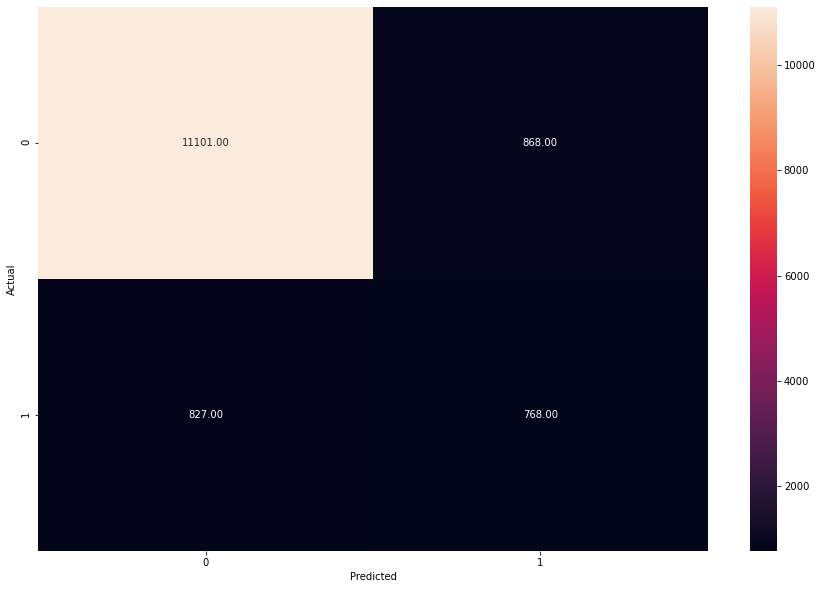

***** Confusion matrix for RandomForest *****


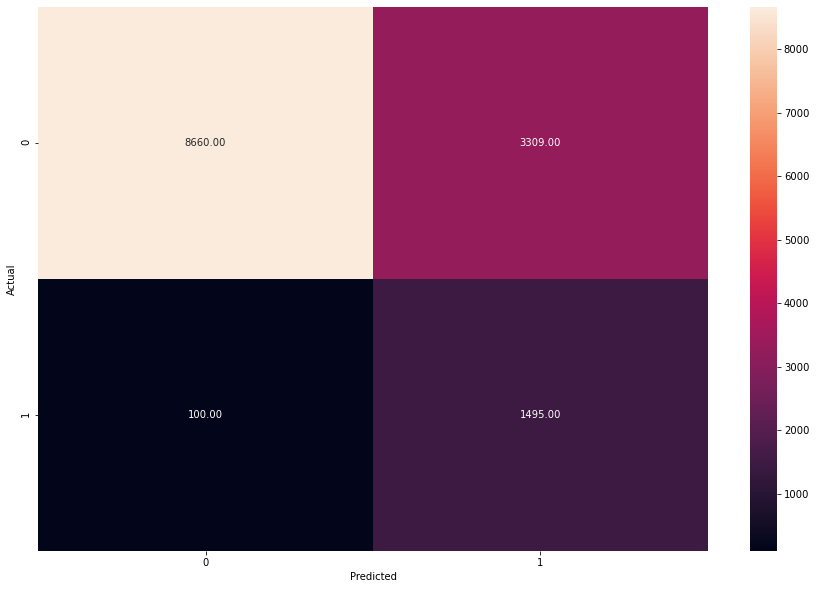

***** Confusion matrix for AdaBoost *****


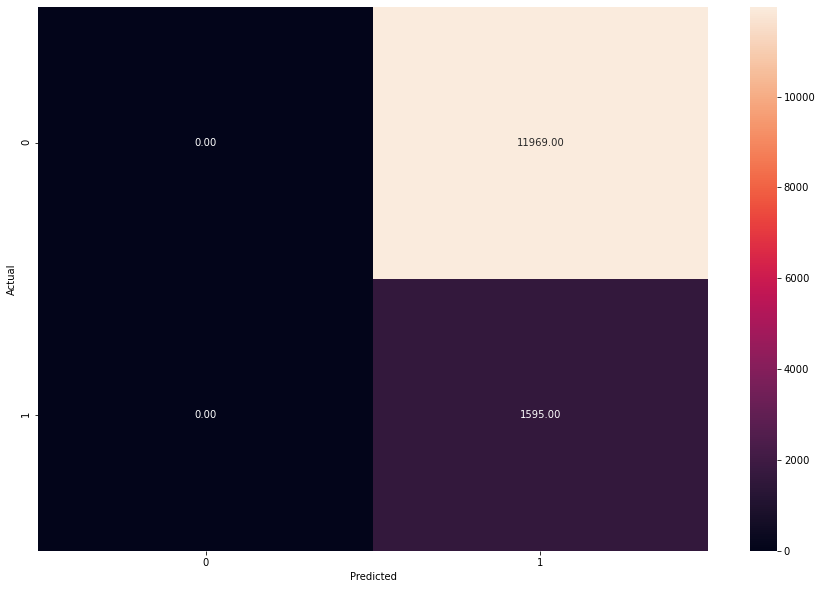

***** Confusion matrix for Bagging *****


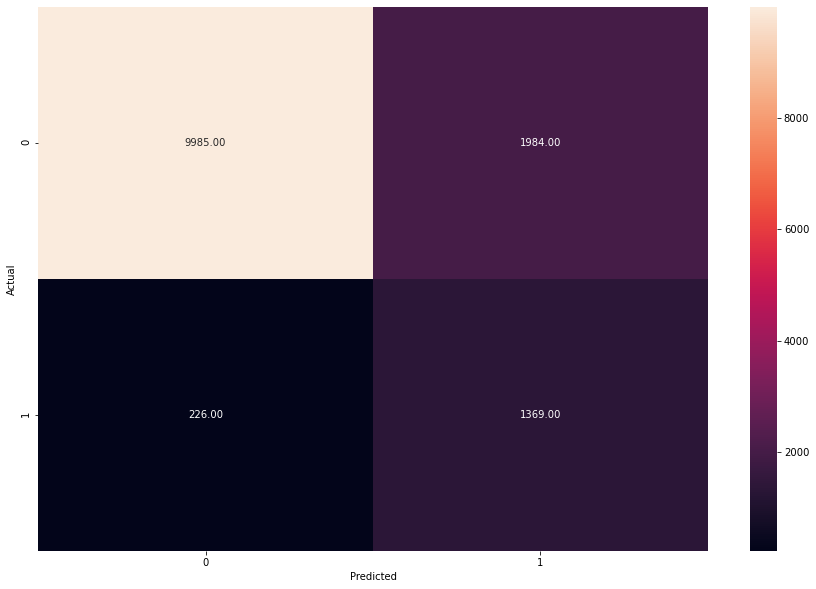

***** Confusion matrix for LogisticRegression *****


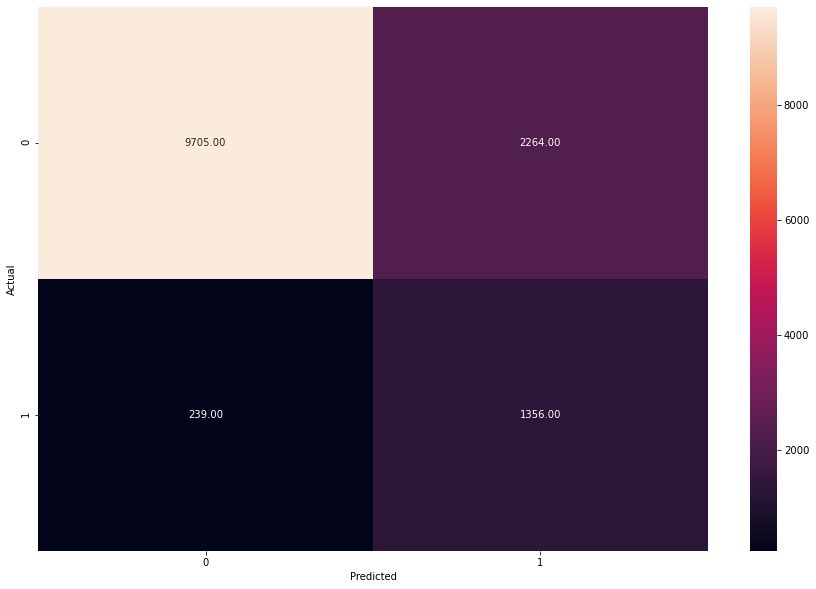

In [198]:
for key in models:
    print("***** Confusion matrix for {} *****".format(key))
    draw_cm( test_vs_pred[key][0], test_vs_pred[key][1] )

In [199]:
# Null accuracy , choose 1 of the classes all the time
# Useful metric when we have an imbalance in class distribution
def compute_null_accuracy(y):
    distrib = y.value_counts(normalize=True)
    return distrib[ np.argmax(distrib) ] * 100

In [200]:
print( "Null accuracy = {}% ".format(compute_null_accuracy(y_test)))

Null accuracy = 88.24093187850191% 


#### Just choosing 0 all the time, will result in 91.5% accuracy, logistic regression  increased it to 95.8%

In [202]:
for key,model in models.items():
    if hasattr(model,'coef_'):
        print("***** Model params for {} *****".format(key))
        ## Feature Importance or Coefficients 
        fi = pd.DataFrame()
        fi['Col'] = X_train.columns
        fi['Coeff'] = np.round(abs(model.coef_[0]),2)
        fi.sort_values(by='Coeff',ascending=False)
        print(fi)

***** Model params for LogisticRegression *****
                    Col  Coeff
0                   age   0.00
1               balance   0.05
2                   day   0.07
3              duration   1.11
4              campaign   0.27
5                 pdays   0.03
6              previous   0.02
7            job_admin.   0.05
8       job_blue-collar   0.03
9      job_entrepreneur   0.04
10        job_housemaid   0.07
11       job_management   0.02
12          job_retired   0.09
13    job_self-employed   0.01
14         job_services   0.02
15          job_student   0.06
16       job_technician   0.00
17       job_unemployed   0.02
18          job_unknown   0.01
19     marital_divorced   0.03
20      marital_married   0.08
21       marital_single   0.06
22    education_primary   0.07
23  education_secondary   0.01
24   education_tertiary   0.07
25    education_unknown   0.00
26           default_no   0.00
27          default_yes   0.00
28           housing_no   0.17
29          housing_ye

### AUC ROC Curve

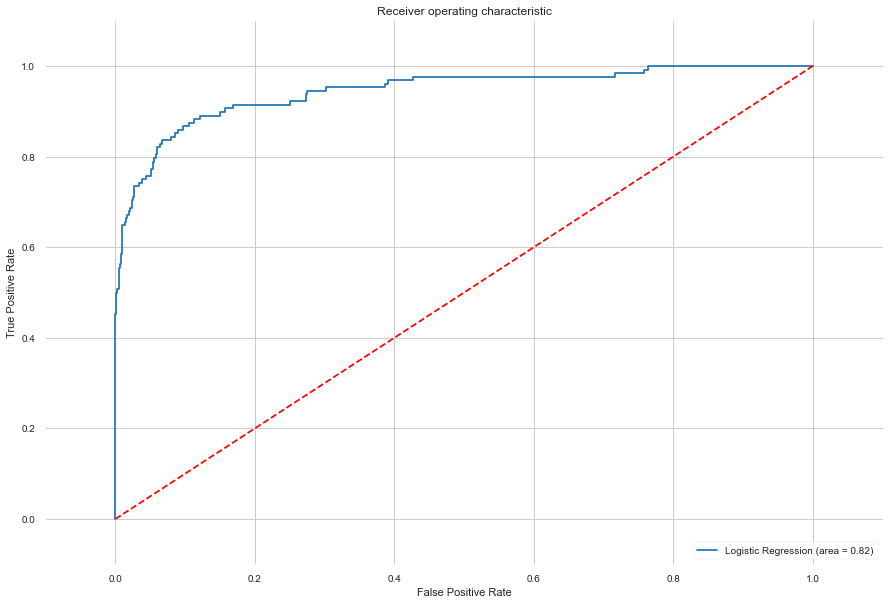

In [266]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15, 10))

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid('on')
plt.show()

**Insights:**
- Looking at the scores and the AUC ROC Curve, we see that with the default threshold of 0.5, the True Positive Rate or Recall is 0.64. 
- You can increase Recall or the TPR by decreasing the number of False Negatives.
- From the AUC ROC Curve we can see that the slope of the curve is high between 0.6 and 0.8, this means that for a small increase in the False Positive Rate, we will see a larger increase in the TPR (Recall score)
- Increasing the Recall score will result in the Precision Score decreasing 
- Precision score decreasing will mean the number of False Positives are increasing.
- From the confusion matrix we see that there are a lot more False Negatives (45) compared to False Positives (18), so there is some scope to make these more balanced without impacting the overall accuracy of ~95%.
- We can do so by adjusting the threshold

## Fine Tuning Threshold
### We plot how the accuracy, precision and recall scores change as we vary the threshold


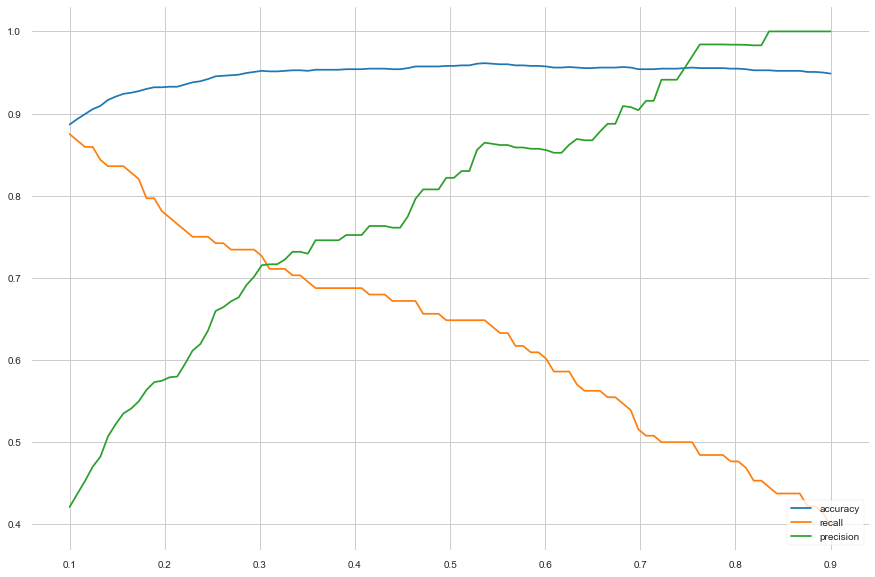

In [267]:
accuracy_plot=[]
recall_plot=[]
precision_plot=[]
x_range = np.linspace(0.1,0.9,100)

for threshold in x_range:
    y_pred = np.where(model.predict_proba(X_test)[:,1] > threshold ,1, 0)
    accuracy_plot.append( accuracy_score(y_test,y_pred))
    recall_plot.append( recall_score(y_test,y_pred))
    precision_plot.append( precision_score(y_test,y_pred))

plt.figure(figsize=(15, 10))
plt.plot(x_range, accuracy_plot,label="accuracy")
plt.plot(x_range, recall_plot,label='recall')
plt.plot(x_range, precision_plot,label='precision')
plt.legend(loc="lower right")
plt.grid('on')
plt.show()

## From the graph a threshold value that balances the precision and recall score seems to be around 0.3

In [268]:
Threshold = 0.3
y_pred = np.where(model.predict_proba(X_test)[:,1] > Threshold ,1, 0)

Testing accuracy 0.952

Confusion Matrix


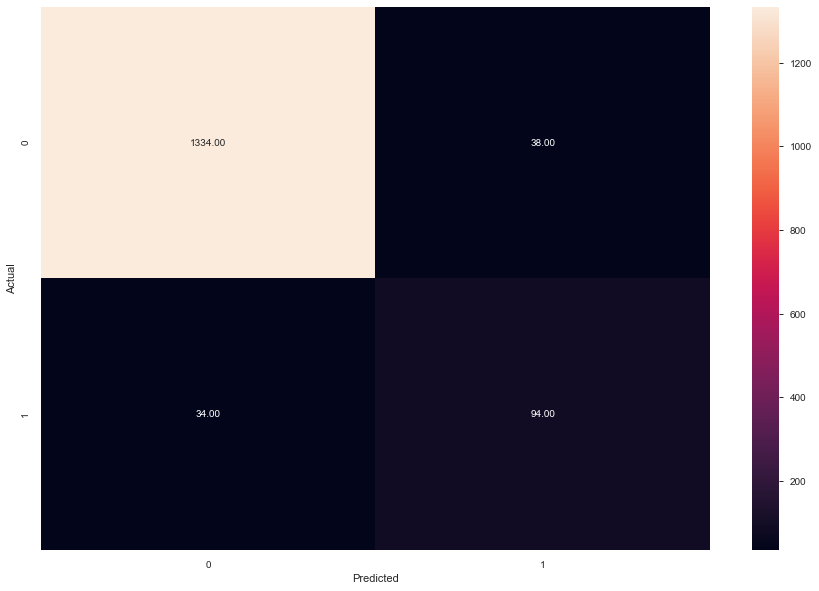


Recall: 0.734375

Precision: 0.7121212121212122

F1 Score: 0.7230769230769231

Roc Auc Score: 0.8533391034985423


In [269]:
print("Testing accuracy",accuracy_score(y_test, y_pred))
print()
print('Confusion Matrix')
draw_cm(y_test,y_pred)
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

### By setting the threshold to 0.3, we the number of False Negatives and False Positives are closer at 34 and 38  each
### The overall accuracy remains at ~95%


## Step 5. Find out 
   * coefficients of all the attributes and show the output in a data frame with column names
   * For test data show all the rows where the predicted class is not equal to the observed class. (**10** marks)

In [270]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
10,Education_1,4.34
7,CD Account,3.23
9,CreditCard,0.87
8,Online,0.77
6,Securities Account,0.61
12,Education_3,0.61
11,Education_2,0.57
3,Family,0.36
4,CCAvg,0.20
0,Age,0.06


In [271]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Actual-Output'] = y_test
z['Predicted-Output'] = y_pred

In [272]:
filter_actual_not_equal_predicted = ( z['Actual-Output'] != z['Predicted-Output'])

In [273]:
z[filter_actual_not_equal_predicted]

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Loans-By-Zipcode,Actual-Output,Predicted-Output
4344,53,28.0,181,1,8.10,0,0,0,1,0,1,0,0,6,0,1
464,43,19.0,83,4,3.60,0,0,0,0,1,0,0,1,13,1,0
308,32,8.0,128,2,4.33,0,0,1,1,1,1,0,0,19,0,1
4284,38,13.0,173,2,3.30,243,0,0,0,0,1,0,0,13,0,1
3288,56,30.0,140,4,0.50,292,0,0,0,0,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,29,5.0,112,2,2.00,382,1,0,0,0,0,1,0,19,0,1
1889,56,30.0,111,4,0.30,372,1,1,1,0,1,0,0,4,1,0
2748,32,7.0,82,1,2.60,240,0,1,1,1,0,1,0,13,0,1
3489,36,12.0,154,3,6.40,0,1,0,0,0,1,0,0,2,1,0


## Step 6. Give conclusion related to the Business understanding of your model? (**5** marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that the customer will accept Personal Loan, and the Customer did accept.

*False Positive (observed=0,predicted=1):*

Predicted that the customer will accept Personal Loan, but the Customer did **not** accept.

*True Negative (observed=0,predicted=0):*

Predicted that the customer will not accept Personal Loan, and the Customer did not accept.

*False Negative (observed=1,predicted=0):*

Predicted that the customer will not accept Personal Loan, and the Customer did accept.


##### `Important Features`

"CDAccount", "Education", "Securities Account", "Online", "Family", "Credit Card"

seems to be top 56 features which influence the model's output. Based on the coefficients value.


##### `Important Metric`

False Negatives represent **Business Opportunities lost**, i,e the customer would have taken the Personal Loan if they were offered it.

False Positives represent **waste of Marketing dollars**, we offered the Personal Loan but the customer did not take it.

I would bias the model towards a lower number of False Negatives, because we can assume that the bank would make far **more profit by having customers accept a Personal Loan**, than the incremental marketing cost.
Lower False Negatives means **Recall is the important metric**. We want to increase Recall without impacting accuracy.

Moving the threshold from 0.5 to 0.3 accomplishes that while maintaining the same accuracy of the model at ~95%

